In [1]:
# 노트 새로 생성할 때 마다 설정해주기
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

### 타이타닉 데이터를 활용한 탑승자의 생사여부 예측

In [2]:
train_df <- read.csv("./Data/Titanic_train.csv")
head(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [4]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


### 컬럼 내용 확인
- Servived : 생존여부, 0 = 사망, 1 = 생존
- Pclass : 티켓 등급, 1 = 1st, 2 = 2nd, 3 = 3rd   
- sibsp : 함께 탑승한 형제, 자매, 배우자의 수
- Parch : 함께 탑승한 부모, 자식의 수
- Ticket : 티켓 번호
- Fare : 운임
- Cabin : 객실번호
- Embarked : 탑승항구, S = Southampthon, C = Chersbourg, Q = Queenstown

In [5]:
# 결측치
colSums(is.na(train_df))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [6]:
177/891

[1] 0.1986532

In [7]:
# train_df$Age가 Na인 것 빼고 데이터셋 만들기
naData <- subset(train_df,is.na(train_df$Age))
naData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
18,18,1,2,"Williams, Mr. Charles Eugene",male,NA,0,0,244373,13.0000,,S
20,20,1,3,"Masselmani, Mrs. Fatima",female,NA,0,0,2649,7.2250,,C
27,27,0,3,"Emir, Mr. Farred Chehab",male,NA,0,0,2631,7.2250,,C
29,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NA,0,0,330959,7.8792,,Q
30,30,0,3,"Todoroff, Mr. Lalio",male,NA,0,0,349216,7.8958,,S
32,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NA,1,0,PC 17569,146.5208,B78,C
33,33,1,3,"Glynn, Miss. Mary Agatha",female,NA,0,0,335677,7.7500,,Q
37,37,1,3,"Mamee, Mr. Hanna",male,NA,0,0,2677,7.2292,,C


In [8]:
# 객실 등급, 운임비 상관관계
cor(train_df$Pclass, train_df$Fare)

[1] -0.5494996

In [9]:
# 성별, 객실 등급
cor(train_df$Sex, train_df$Pclass)

ERROR: Error in cor(train_df$Sex, train_df$Pclass): 'x'는 반드시 수치형이어야 합니다


In [ ]:
# Survived 기준으로 Dataset 정렬
library(dplyr)
train_df <- arrange(train_df,train_df$Survived)
head(train_df)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


# Targer Column 성립?

In [ ]:
#Survived의 생존과 사망의 비율 검토
table(train_df$Survived)

(549/891) * 100 # 사망자수
(342/891) * 100 # 생존자수


  0   1 
549 342 

[1] 61.61616

[1] 38.38384

In [ ]:
# install.packages("plotrix")


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/m_/mvqr52cd7tgf4xygqb9xyxyr0000gn/T//RtmpzGMvww/downloaded_packages


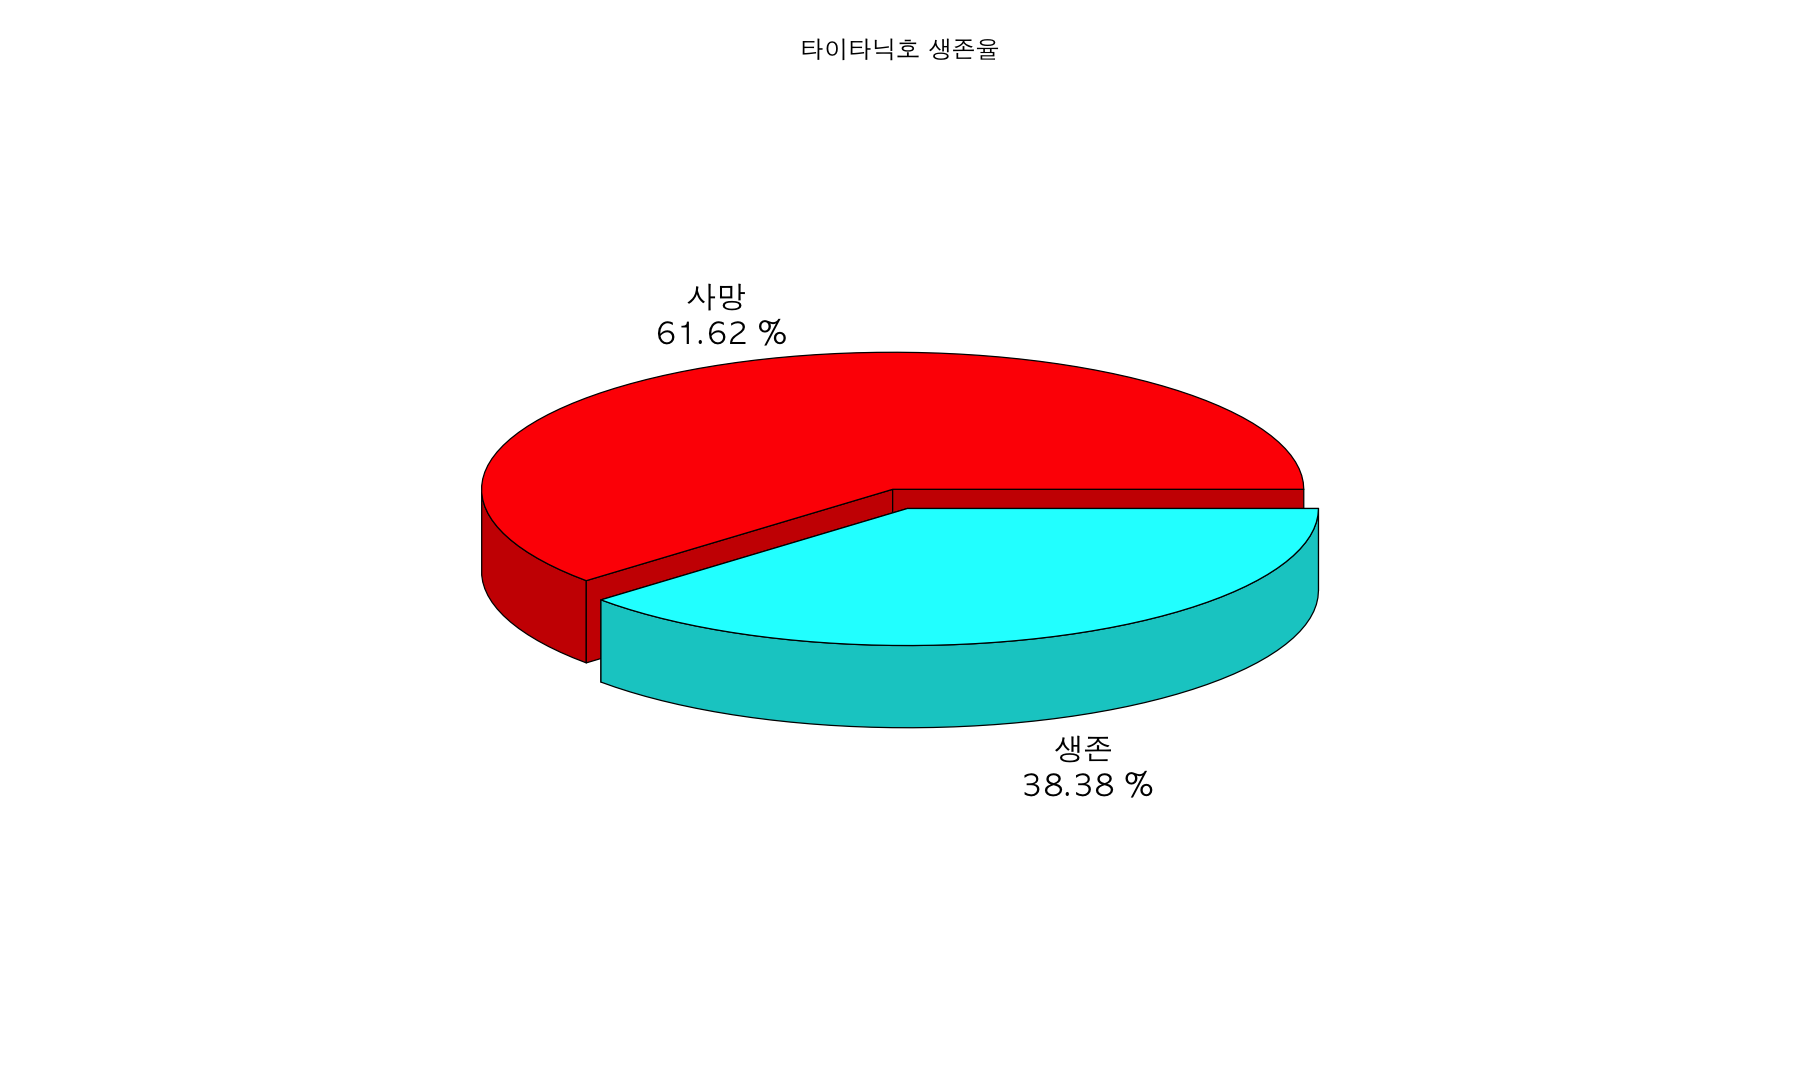

In [ ]:
surv <- c((549/891) * 100,(342/891) * 100)
label <- c(paste("사망\n",round((549/891) * 100,2),"%"),paste("생존\n",round((342/891) * 100,2),"%"))

library(plotrix)
par(family='AppleGothic', bg='white')
pie3D(surv,
    main = "타이타닉호 생존율",
    labels = label,
    explode = 0.05
)

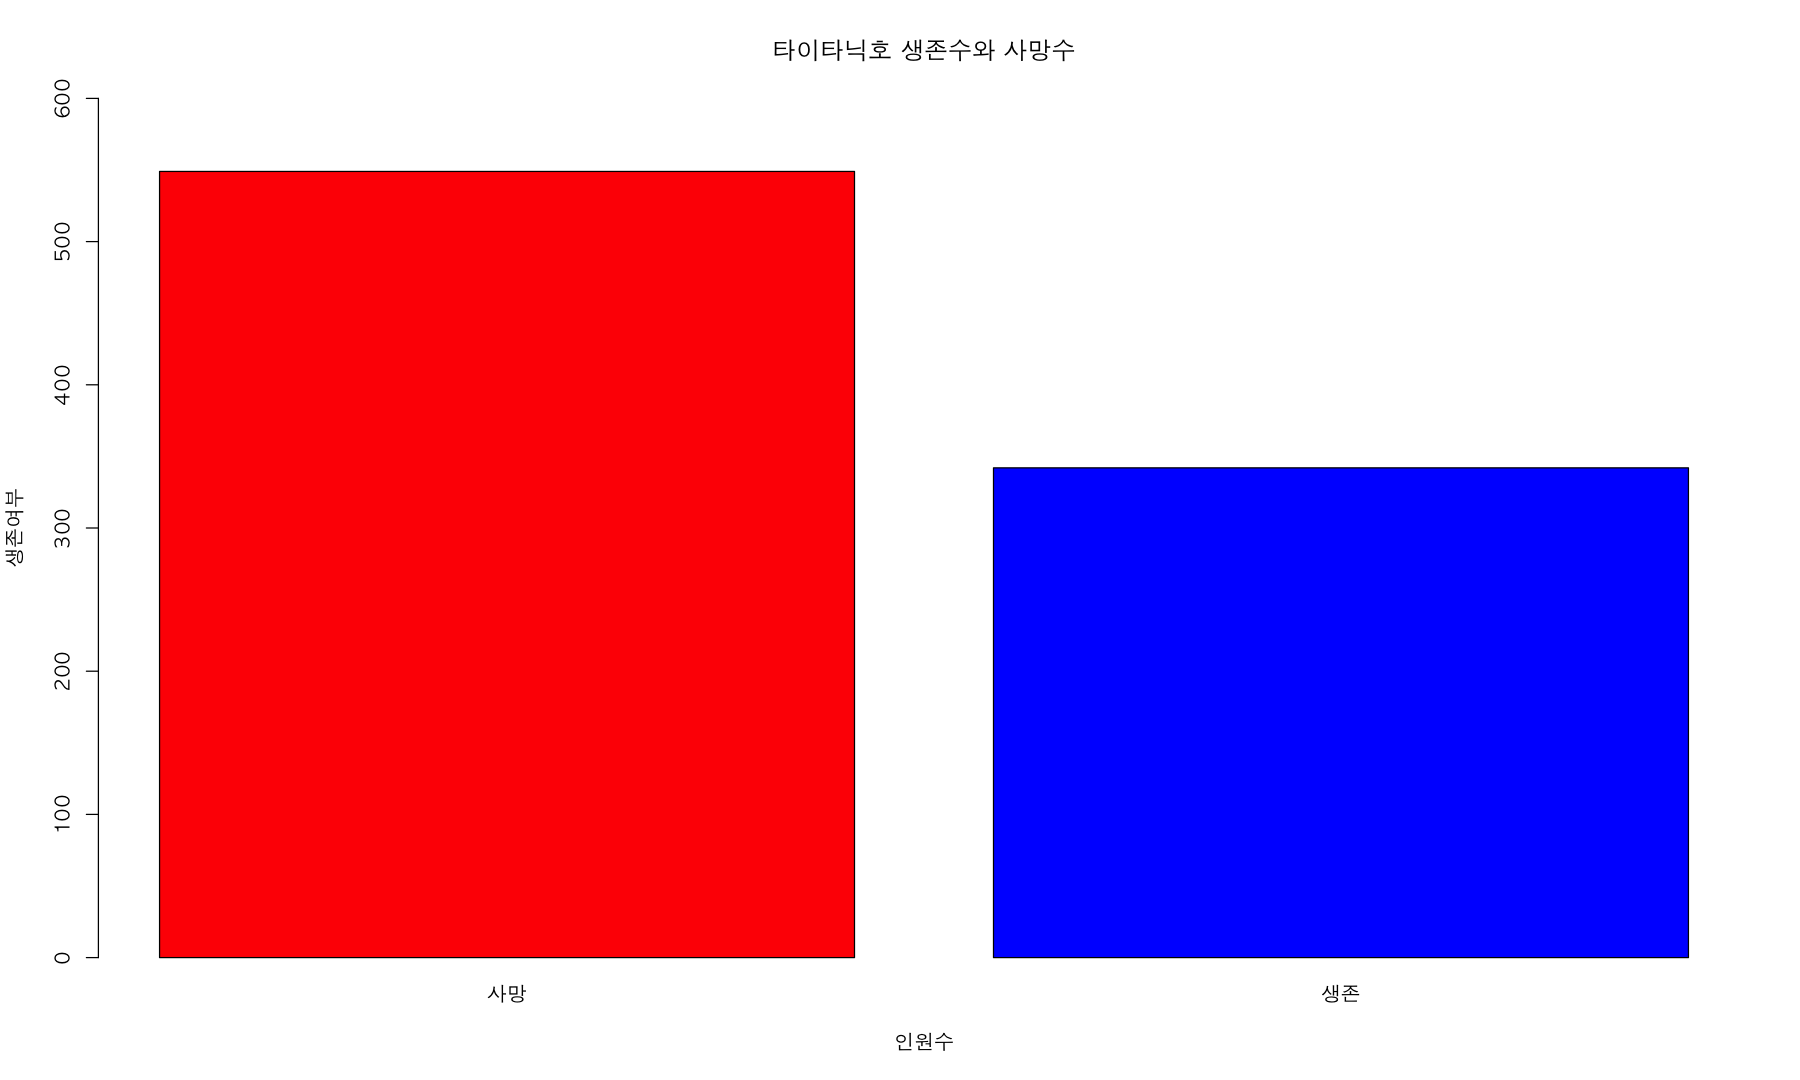

In [ ]:
surv2 <- c(nrow(subset(train_df,Survived==0)),nrow(subset(train_df,Survived==1)))
par(family='AppleGothic', bg='white')
barplot(surv2,
    main = "타이타닉호 생존수와 사망수",
    names = c("사망","생존"),
    col = c("red","blue"),
    xlab = "인원수",
    ylab = "생존여부",
    ylim = c(0,600)
)

# Feature Column 구성

In [ ]:
head(train_df)

,X...PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [ ]:
# Sex 컬럼 분류 확인
# 여성의 인원가 남성의 인원 확인
table(train_df$Sex)


female   male 
   314    577 

In [ ]:
# 여성의 생존과 사망 인원
table(subset(train_df, Sex=='female')$Survived)

# 남성의 생존과 사망 인원
table(subset(train_df, Sex=='male')$Survived)


  0   1 
 81 233 


  0   1 
468 109 

In [ ]:
# 여성의 생존율과 사망율
f1 <- round(nrow(subset(subset(train_df, Sex=='female'),Survived==1)) / nrow(subset(train_df, Sex=='female')) * 100,1)
f0 <- round(nrow(subset(subset(train_df, Sex=='female'),Survived==0)) / nrow(subset(train_df, Sex=='female')) * 100,1)
cat("여성의 생존율 :",round(nrow(subset(subset(train_df, Sex=='female'),Survived==1)) / nrow(subset(train_df, Sex=='female')) * 100,1),"%\n")
cat("여성의 사망율 :",round(nrow(subset(subset(train_df, Sex=='female'),Survived==0)) / nrow(subset(train_df, Sex=='female')) * 100,1),"%\n")

# 남성의 생존율과 사망율
m1 <- round(nrow(subset(subset(train_df, Sex=='male'),Survived==1)) / nrow(subset(train_df, Sex=='male')) * 100,1)
m0 <- round(nrow(subset(subset(train_df, Sex=='male'),Survived==0)) / nrow(subset(train_df, Sex=='male')) * 100,1)
cat("남성의 생존율 :",round(nrow(subset(subset(train_df, Sex=='male'),Survived==1)) / nrow(subset(train_df, Sex=='male')) * 100,1),"%\n")
cat("남성의 사망율 :",round(nrow(subset(subset(train_df, Sex=='male'),Survived==0)) / nrow(subset(train_df, Sex=='male')) * 100,1),"%")

여성의 생존율 : 74.2 %
여성의 사망율 : 25.8 %
남성의 생존율 : 18.9 %
남성의 사망율 : 81.1 %

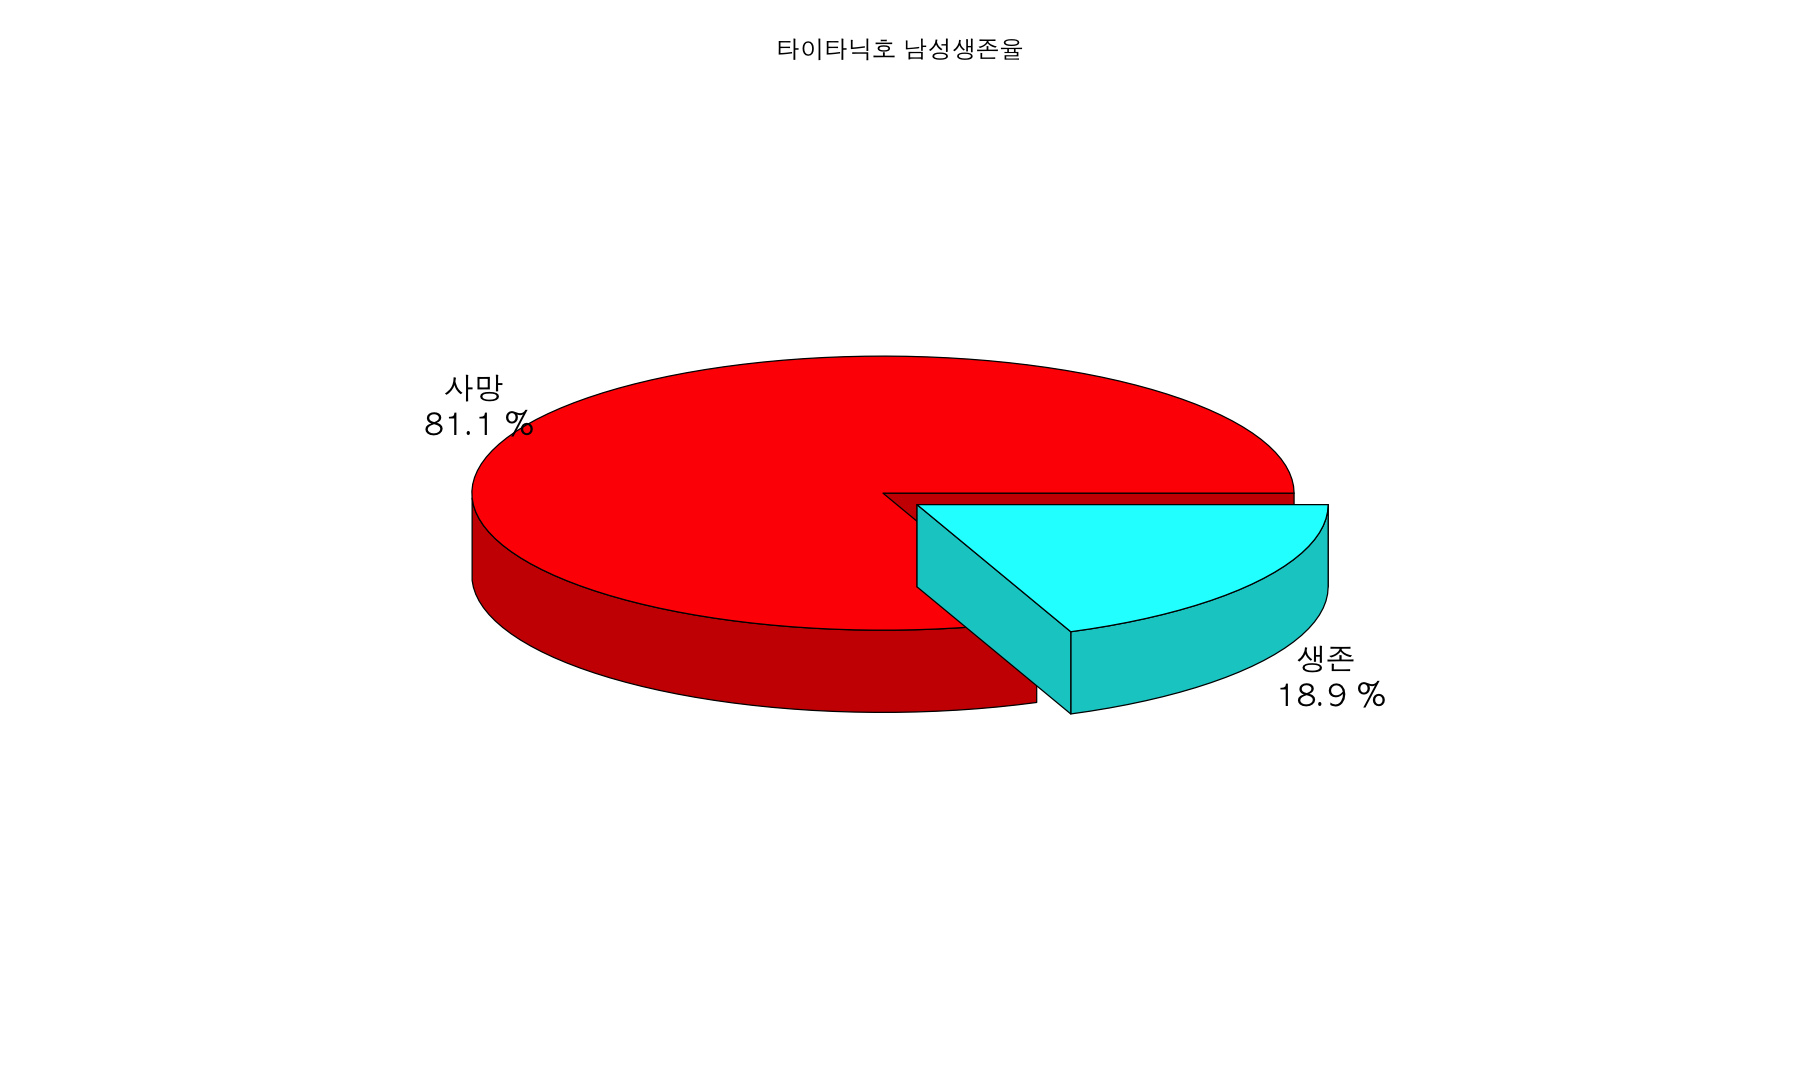

In [ ]:
male <- c(m0,m1)

label <- c(paste("사망\n",m0,"%"),paste("생존\n",m1,"%"))

par(family='AppleGothic', bg='white')
pie3D(male,
    main = "타이타닉호 남성생존율",
    labels = label,
    explode = 0.05)

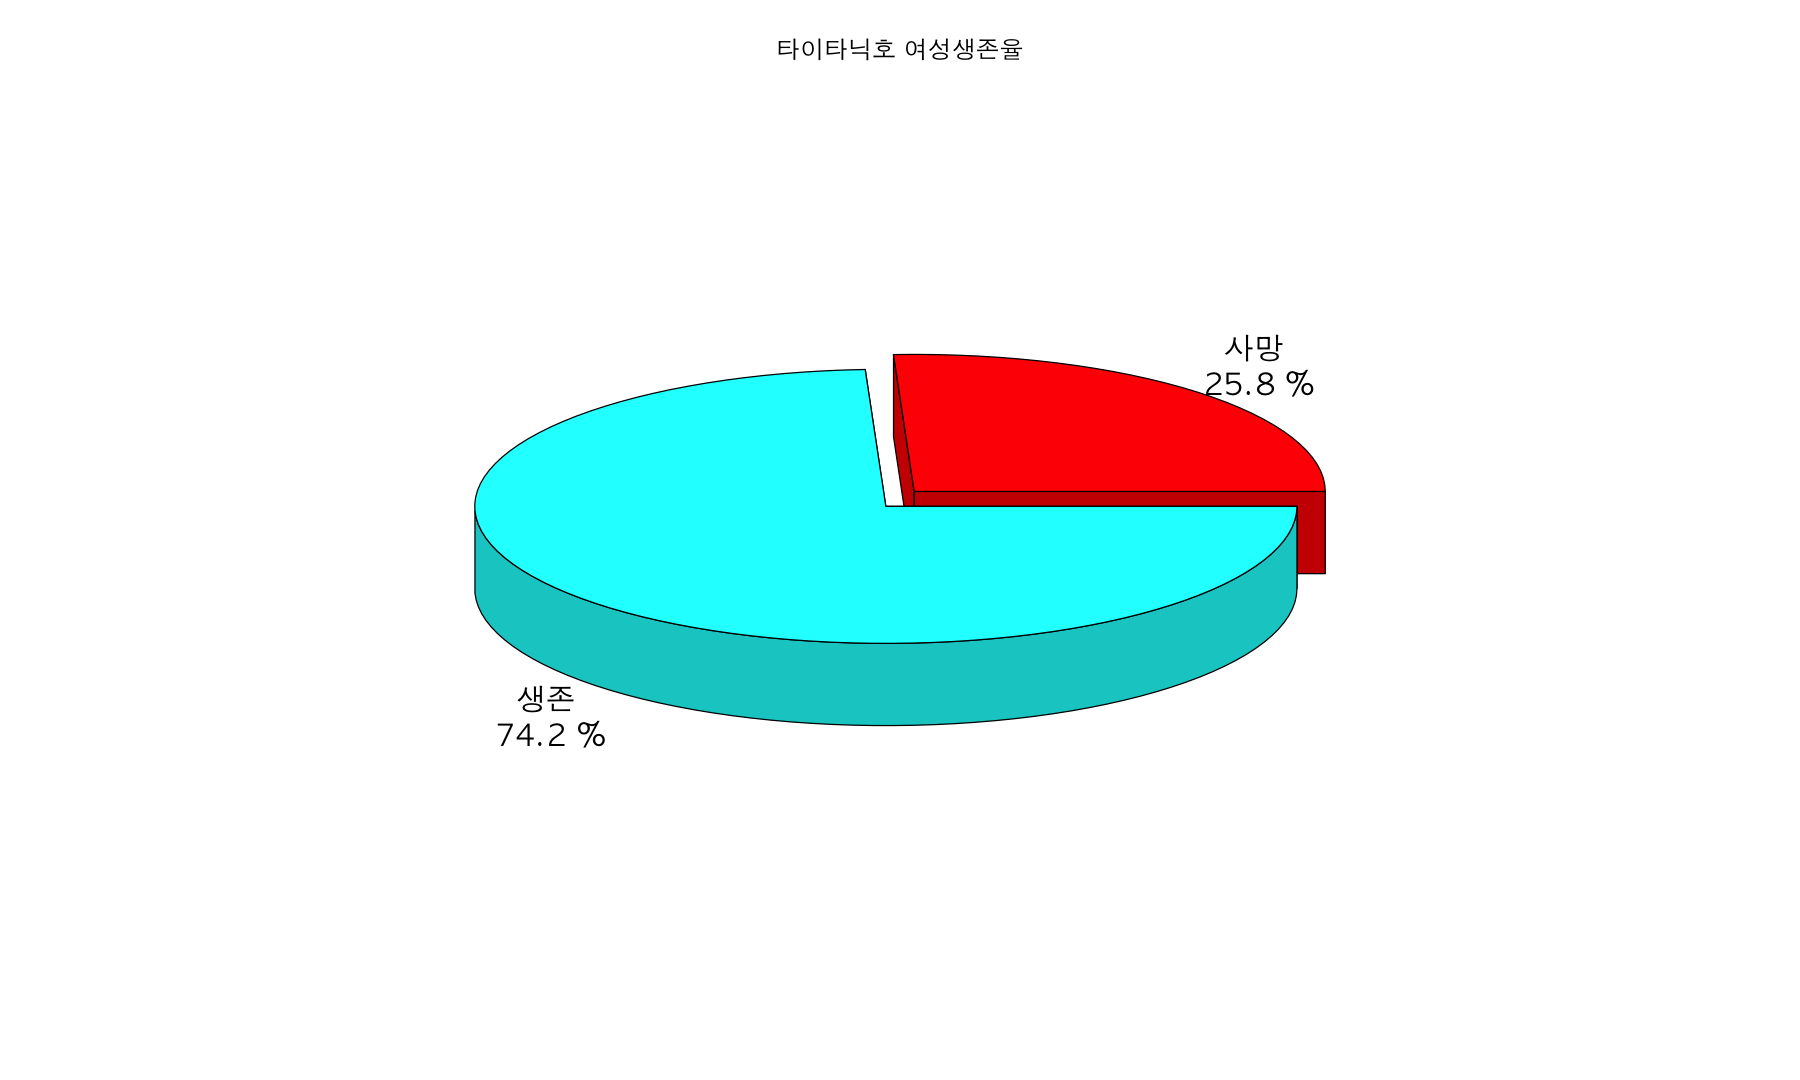

In [ ]:
female <- c(f0,f1)

flabel <- c(paste("사망\n",f0,"%"),paste("생존\n",f1,"%"))

par(family='AppleGothic', bg='white')
pie3D(female,
    main = "타이타닉호 여성생존율",
    labels = flabel,
    explode = 0.05)

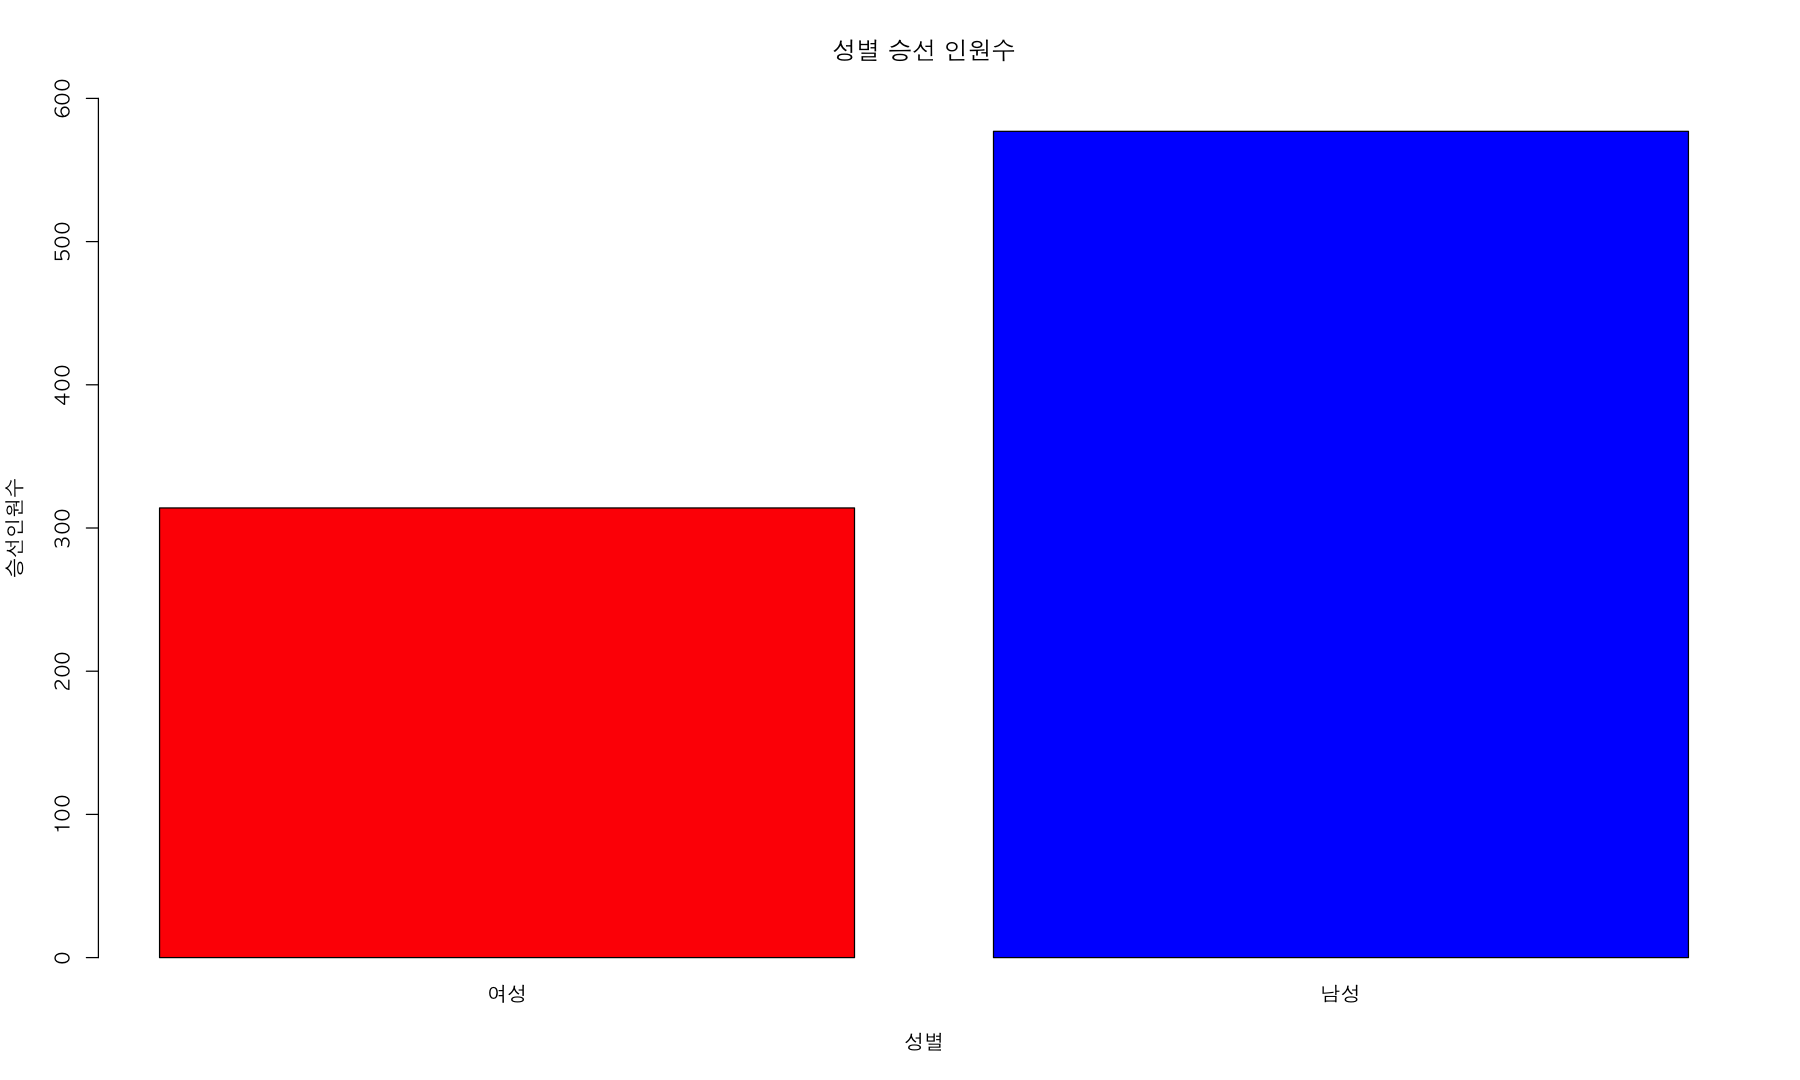

In [ ]:
tsex <- c(nrow(subset(train_df,Sex == 'female')),nrow(subset(train_df,Sex == 'male')))

par(family='AppleGothic', bg='white')
barplot(tsex,
    main = "성별 승선 인원수",
    names = c("여성","남성"),
    col = c("red","blue"),
    ylim = c(0,600),
    xlab = "성별",
    ylab = "승선인원수"
)

[Survived] <- [Sex]

In [ ]:
head(train_df)

,X...PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


## 티켓 등급 분석

In [ ]:
# 티켓등급 분류
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [ ]:
# 1등객실의 여성 생존율
f1female <- subset(f1class,Sex=='female'&Pclass==1)

cat("1등 객실의 여성 생존율은",nrow(subset(f1female,Survived==1)),"/",nrow(f1female),",",round(nrow(subset(f1female,Survived==1))/nrow(f1female)*100,2),"%")


1등 객실의 여성 생존율은 91 / 94 , 96.81 %

In [ ]:
# 1,2,3등 객실의 여성 생존율을 for문을 이용해 해결
for(i in 1:3){
    f1female <- subset(train_df,Sex=='female' & Pclass==i)

    cat(i,"등 객실의 여성 생존율은",nrow(subset(f1female,Survived==1)),"/",nrow(f1female),",",round(nrow(subset(f1female,Survived==1))/nrow(f1female)*100,2),"%\n")

}

1 등 객실의 여성 생존율은 91 / 94 , 96.81 %
2 등 객실의 여성 생존율은 70 / 76 , 92.11 %
3 등 객실의 여성 생존율은 72 / 144 , 50 %


[Survived] <- [Sex, pclass, Embarked]

In [ ]:
train_df_T <- train_df

In [ ]:
target_col <- c("Survived", "Sex", "Pclass", "Embarked")
head(train_df_T[, target_col])

,Survived,Sex,Pclass,Embarked
,<int>,<chr>,<int>,<chr>
1,0,male,3,S
2,0,male,3,S
3,0,male,3,Q
4,0,male,1,S
5,0,male,3,S
6,0,male,3,S


In [ ]:
# 성별을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [ ]:
target_col <- c("Survived", "SexCode", "Pclass", "Embarked")
train_df_T[, target_col]

Survived,SexCode,Pclass,Embarked
<int>,<dbl>,<int>,<chr>
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S
0,0,3,S
0,1,3,S
0,0,3,Q


In [ ]:
train_df_T$Embarked_C <- train_df$Embarked == "C"
train_df_T$Embarked_S <- train_df$Embarked == "S"
train_df_T$Embarked_Q <- train_df$Embarked == "Q"

In [ ]:
target_col <- c("Survived", "SexCode", "Pclass", "Embarked_C", "Embarked_S", "Embarked_Q")
tail(train_df_T[, target_col])

,Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
,<int>,<dbl>,<int>,<lgl>,<lgl>,<lgl>
886,1,0,2,TRUE,FALSE,FALSE
887,1,0,3,TRUE,FALSE,FALSE
888,1,0,1,TRUE,FALSE,FALSE
889,1,0,2,FALSE,TRUE,FALSE
890,1,0,1,FALSE,TRUE,FALSE
891,1,0,1,TRUE,FALSE,FALSE


In [ ]:
# Machine Learning 작업을 위한 최종 Feature

In [ ]:
train_df2 <- train_df_T[, target_col]

In [ ]:
head(train_df2)

,Survived,SexCode,Pclass,Embarked_C,Embarked_S,Embarked_Q
,<int>,<dbl>,<int>,<lgl>,<lgl>,<lgl>
1,0,0,3,FALSE,TRUE,FALSE
2,0,0,3,FALSE,TRUE,FALSE
3,0,0,3,FALSE,FALSE,TRUE
4,0,0,1,FALSE,TRUE,FALSE
5,0,0,3,FALSE,TRUE,FALSE
6,0,0,3,FALSE,TRUE,FALSE


In [ ]:
# RandomForest 생사여부 예측율과 오분류표 구하기
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


다음의 패키지를 부착합니다: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
train_df2$Survived <- as.factor(train_df2$Survived)
str(train_df2)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ SexCode   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [ ]:
rfFun <- function(x) {
# result <- run  # 예측 정확도를 저장할 벡터 초기화

for (i in 1:x) {
    # 학습용, 검증용 분류
    samp <- createDataPartition(train_df2$Survived, p = 0.7, list = F)
    
    # 학습용, 검증용
    data.tr <- train_df2[samp, ]
    data.test <- train_df2[-samp, ]
    
    # 문제 및 정답 만들기
    x <- subset(data.test, select = -Survived)
    y <- data.test$Survived
    
    # 모델 학습
    rf <- randomForest(Survived ~ ., data = data.tr, ntree = 100)
    
    # 예측하기
    pred <- predict(rf, x)
    
    # 정확도 계산 및 저장
    # result[i] <- mean(pred == y)
    
    # 예측 결과 출력
    #cat(i, "번째 예측 :", round(result[i] * 100, 1), "\n")
}

# 예측력
    print (mean(pred == y))

# 오분류표
    table(pred, y)

# 평균 정확도 출력
#cat("평균 정확도:", mean(result), "\n")
}

# 함수 호출하여 5개의 반복 예측 및 평균 정확도 출력
#rfFun(5)

In [ ]:
rfFun(5)

ERROR: Error in createDataPartition(train_df2$Survived, p = 0.7, list = F): 함수 "createDataPartition"를 찾을 수 없습니다
